In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Kaggle'

In [ ]:
%cd /content/drive/My\ Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip creditcardfraud.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load dataset

dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# check null

dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Dataset menunjukan jumlah data yang imbalance 

In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

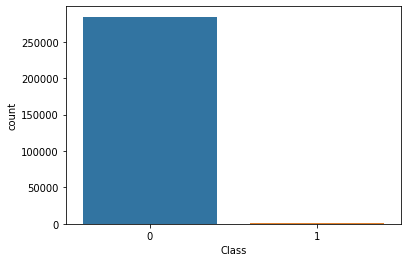

In [ ]:
sns.countplot(dataset.Class)
plt.show()

In [ ]:
fraud_class = dataset[dataset.Class == 1]
normal_class = dataset[dataset.Class == 0]

print(f'Shape of Fraud Transactions: {fraud_class.shape}')
print(f'Shape of Normal Transactions: {normal_class.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (284315, 31)


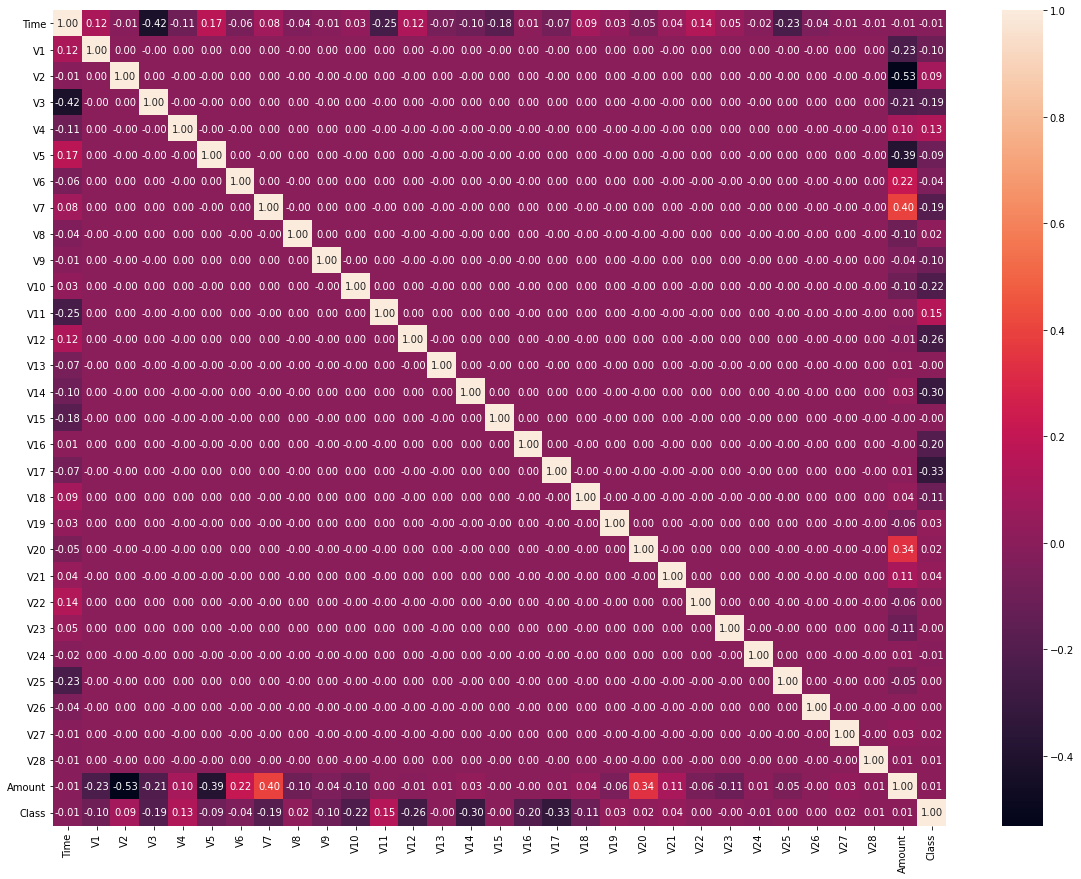

In [ ]:
corr = dataset.corr()

plt.figure(figsize=(20,15))
sns.heatmap(data=corr, annot=True, fmt='.2f')
plt.show()

# Rescaling atau Normalisasi


In [ ]:
# semua data telah mengalami scaling kecuali time dan amount 
# jadi kenapa menggunakan robust scaler karena itu scaler yang kuat untuk mengatasi outliers (mencoba coba)

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

In [ ]:
# values mengubah menjadi numpy ndarray agar bisa di reshape 
# reshape karena shape yang berbeda maka harus di reshape (notif error from notebook)

dataset['scaled_time'] = robust_scaler.fit_transform(dataset.Time.values.reshape(-1,1))
dataset['scaled_amount'] = robust_scaler.fit_transform(dataset.Amount.values.reshape(-1,1))

dataset = dataset.drop(['Time', 'Amount'], axis=1)

In [ ]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [ ]:
# memindah urutan scaled time and amount

scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
dataset.insert(0, 'scaled_amount', scaled_amount) # now scaled_amount is at the 1st position of columns list
dataset.insert(1, 'scaled_time', scaled_time) # now scaled_time is at the 2nd position of the columns lis

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
# loc utk mengambil semua berdasarkan input sedangkan iloc mengambil satuan input

# menyamakan jumlah dataset agar balance
fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0][:492]

new_dataset = pd.concat([fraud, normal])

# merandon dataset value nya 
new_dataset = new_dataset.sample(frac=1, random_state=42)

new_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.994079,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,1.527192,-0.131506,-1.696914,0.482121,0.586418,0.034541,-0.306278,-0.206030,-0.118939,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.993104,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,0.252013,0.740676,0.588884,0.480297,0.799412,-0.592090,0.032839,-1.012363,-0.799293,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


# Data already Balance

In [ ]:
fraud_class = new_dataset[new_dataset.Class == 1]
normal_class = new_dataset[new_dataset.Class == 0]

print(f'Shape of Fraud Transactions: {fraud_class.shape}')
print(f'Shape of Normal Transactions: {normal_class.shape}')

Shape of Fraud Transactions: (492, 31)
Shape of Normal Transactions: (492, 31)


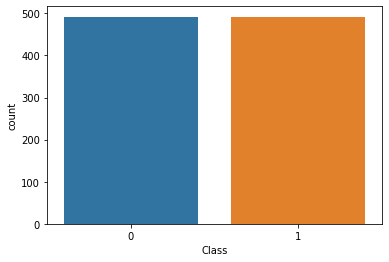

In [ ]:
sns.countplot(new_dataset.Class)
plt.show()

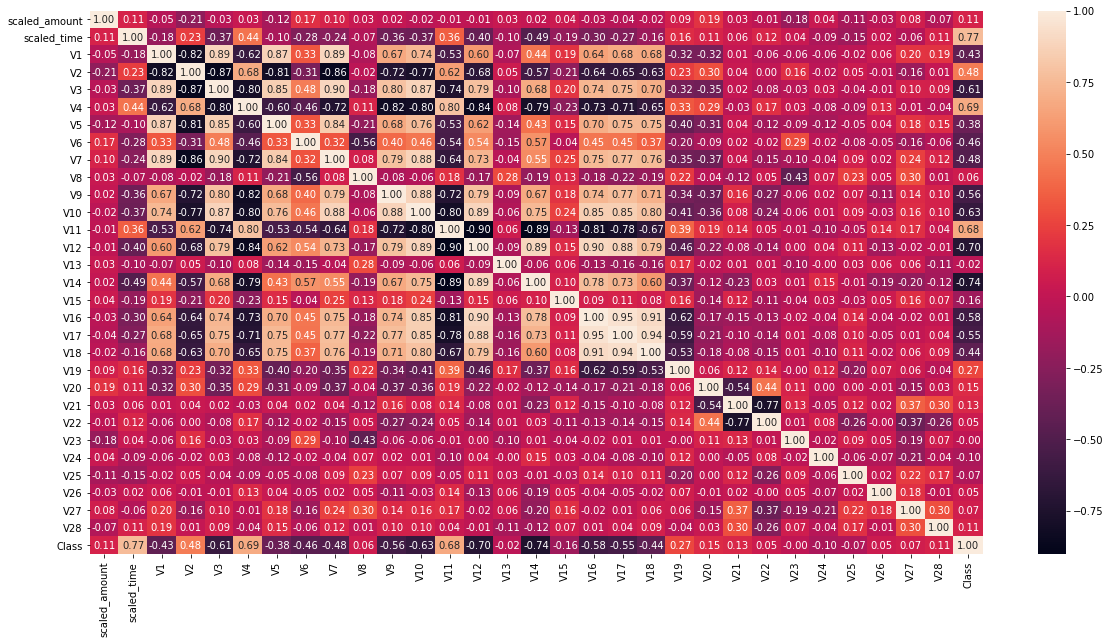

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data=new_dataset.corr(), annot=True, fmt='.2f')
plt.show()

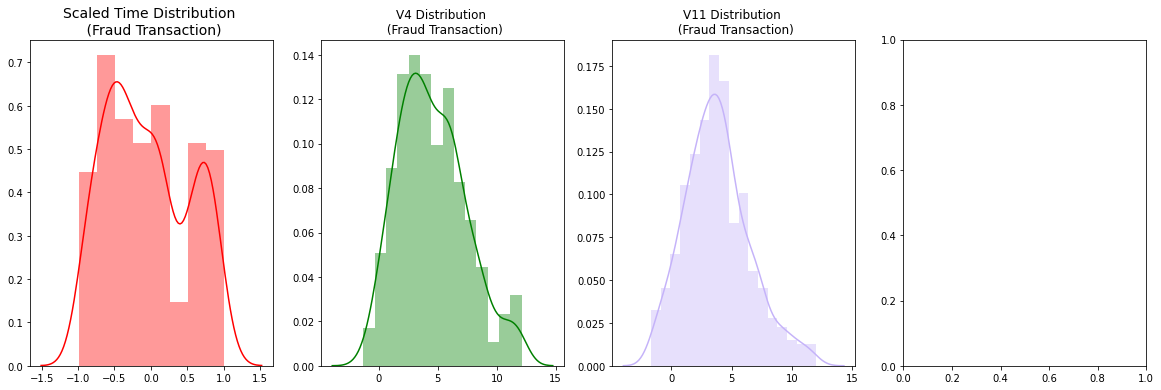

In [ ]:
f, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize=(20,6))

scaled_time_fraud_dist = new_dataset['scaled_time'].loc[new_dataset['Class']==1].values # trying to get to know how much V14 is affecting the chances of being Fraud
sns.distplot(scaled_time_fraud_dist, ax=ax1, color='r')
ax1.set_title('Scaled Time Distribution \n (Fraud Transaction)', fontsize=14)

v4_fraud_dist = new_dataset['V4'].loc[new_dataset['Class']==1].values # trying to get to know how much V12 is affecting the chances of being Fraud
sns.distplot(v4_fraud_dist, ax=ax2, color='g')
ax2.set_title('V4 Distribution \n (Fraud Transaction)')

v11_fraud_dist = new_dataset['V11'].loc[new_dataset['Class']==1].values # trying to get to know how much V10 is affecting the chances of being Fraud
sns.distplot(v11_fraud_dist, ax=ax3, color='#C5B3F9')
ax3.set_title('V11 Distribution \n (Fraud Transaction)')

plt.show()

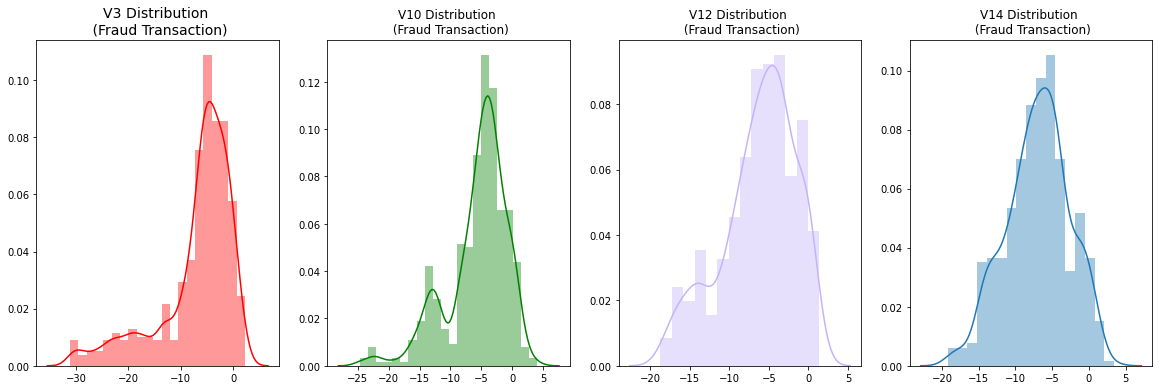

In [ ]:
f, (ax1,ax2,ax3, ax4) = plt.subplots(1,4, figsize=(20,6))

v3_fraud_dist = new_dataset['V3'].loc[new_dataset['Class']==1].values # trying to get to know how much V14 is affecting the chances of being Fraud
sns.distplot(v3_fraud_dist, ax=ax1, color='r')
ax1.set_title('V3 Distribution \n (Fraud Transaction)', fontsize=14)

v10_fraud_dist = new_dataset['V10'].loc[new_dataset['Class']==1].values # trying to get to know how much V12 is affecting the chances of being Fraud
sns.distplot(v10_fraud_dist, ax=ax2, color='g')
ax2.set_title('V10 Distribution \n (Fraud Transaction)')

v12_fraud_dist = new_dataset['V12'].loc[new_dataset['Class']==1].values # trying to get to know how much V12 is affecting the chances of being Fraud
sns.distplot(v12_fraud_dist, ax=ax3, color='#C5B3F9')
ax3.set_title('V12 Distribution \n (Fraud Transaction)')

v14_fraud_dist = new_dataset['V14'].loc[new_dataset['Class']==1].values # trying to get to know how much V10 is affecting the chances of being Fraud
sns.distplot(v14_fraud_dist, ax=ax4)
ax4.set_title('V14 Distribution \n (Fraud Transaction)')

plt.show()

In [ ]:
# find outliers from high correlated matrix above

In [ ]:
outlier_list = ['scaled_time', 'V4', 'V11', 'V3', "V10", 'V12', 'V14']

def remove_outliers():
  global new_dataset
  for i in outlier_list:
    data_fraud = new_dataset[i].loc[new_dataset['Class']==1].values
    q25 = np.percentile(data_fraud, 25)  # Calculating the 25 percentile
    q75 = np.percentile(data_fraud, 75)  # Calculating the 75 percentile
    iqr = q75-q25

    cut_off = iqr*1.5
    lower = q25-cut_off # setting the lower limit
    upper = q75+cut_off # setting the upper limit

    outliers = [x for x in data_fraud if x < lower or x > upper]
    print(f'Features {i} Outliers for Fraud Cases: {len(outliers)}')
    print(f'{i} outliers:{outliers}')
    print('\n')

    new_dataset = new_dataset.drop(new_dataset[(new_dataset[i] > upper) | (new_dataset[i] < lower)].index)


remove_outliers()

Features scaled_time Outliers for Fraud Cases: 0
scaled_time outliers:[]


Features V4 Outliers for Fraud Cases: 0
V4 outliers:[]


Features V11 Outliers for Fraud Cases: 10
V11 outliers:[11.6692047358121, 12.018913181619899, 11.6197234753825, 11.0270590938161, 10.5452629545898, 11.152490598583698, 11.277920727806698, 11.228470279576001, 10.8530116481991, 10.446846814514]


Features V3 Outliers for Fraud Cases: 56
V3 outliers:[-24.098871851647, -19.947726046163, -24.643818777122604, -28.923755945104, -20.363885973914897, -26.278700586614498, -27.855811133621202, -22.464082746487602, -24.667741248573197, -27.368650288126602, -18.572307456296002, -22.209874815521, -17.6810718207918, -18.256576111808, -19.7393862972953, -30.013712485724803, -23.5539329441267, -21.872317364456602, -30.1773174564996, -20.4919522106577, -29.4687320925264, -22.8652284959099, -24.2021422329158, -18.256576111808, -30.1773174564996, -30.5586968214292, -30.1773174564996, -19.5750661905691, -25.7337337663194, -18.

In [ ]:
new_dataset

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-0.994079,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,1.527192,-0.131506,-1.696914,0.482121,0.586418,0.034541,-0.306278,-0.206030,-0.118939,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-0.993104,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,0.252013,0.740676,0.588884,0.480297,0.799412,-0.592090,0.032839,-1.012363,-0.799293,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,0.768888,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,0.006967,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,-0.293440,-0.517276,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,5.730084,-5.031868,-1.135439,-10.787051,0.265456,-1.104217,0.636413,0.994101,-0.688721,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1
142557,4.643750,0.001140,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,1.274629,0.023682,-1.521696,0.727242,0.166505,0.348038,-0.566390,0.216016,-1.140376,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,1
368,-0.271082,-0.991823,1.320626,-1.174338,0.713431,-2.177941,-1.511234,0.059314,-1.308064,0.298796,0.788814,-0.200099,0.835251,0.506268,-0.892308,0.083951,0.871965,-1.856353,0.163268,1.670423,0.061359,-0.577243,-0.354221,-0.365280,0.064822,-0.322003,0.152701,-0.003131,0.075103,0.010941,0
239499,0.391253,0.768877,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,-4.485483,1.903999,-2.644219,-0.982273,-4.691151,-0.693080,-2.553251,-3.483436,-0.064852,1.490329,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,1


# Split Data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X = new_dataset.drop(columns=["Class"])
y = new_dataset.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Make Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Predicting with default paramater classifier

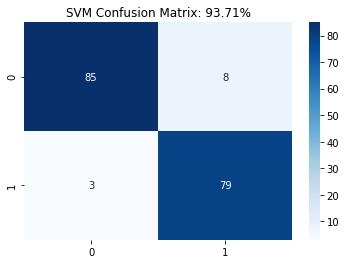

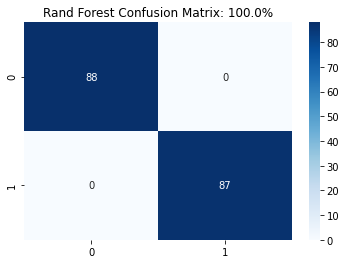

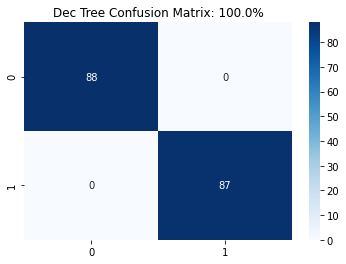

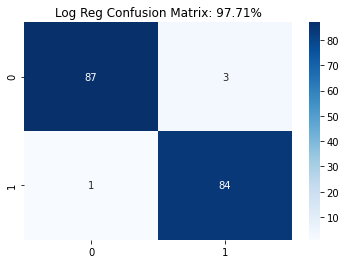

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nama_clasifier = ["SVM", "Rand Forest", "Dec Tree", "Log Reg"]
models = [svm, rf, dt, lr]
akurasi = []
index = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    cm = confusion_matrix(y_pred, y_test)
    plt.title(f"{nama_clasifier[index]} Confusion Matrix: {round(acc*100,2)}%")
    sns.heatmap(cm, cmap="Blues", annot=True)
    plt.show()
    
    akurasi.append(acc)
    index += 1

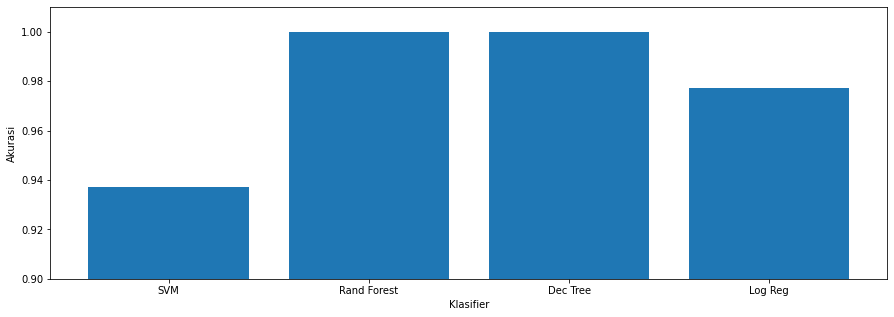

In [ ]:
plt.figure(figsize=(15,5)) # urutan (width, height)
plt.bar(nama_clasifier, akurasi)
plt.xlabel("Klasifier")
plt.ylabel("Akurasi")
plt.ylim(0.9, 1.01)
plt.show()

# Tuning Classifier 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter = {
    svm:{
        "C":[10,100,1000,10000],
        'kernel':['rbf', 'linear'],
        'gamma':[10,100,1000]
    },
    # dt:{
    #     'criterion':['gini', 'entropy'],
    #     'min_samples_split':[2,4,6],
    #     'min_samples_leaf':[1,2,5],
    #     'max_depth':["none", 1,2,4]
    # },
    # rf:{
    #     'n_estimators':[10,100,1000,10000],
    #     'criterion':['gini', 'entropy'],
    #     'min_samples_split':[2,4,6],
    #     'min_samples_leaf':[1,2,5],
    #     'max_depth':["none", 1,2,4]
    # },
    lr:{
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        "penalty": ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    }
}

# for i in [svm, lr]:
#   grid_search = GridSearchCV(i, param_grid=parameter[i], cv=10, scoring='accuracy')
#   grid_search.fit(X_train, y_train)
#   print(grid_search.best_params_)
#   print("{i} finished\n")

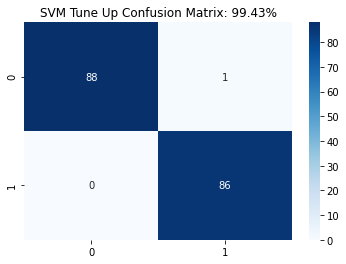

In [ ]:
svm_tune = SVC(C=100, gamma=10, kernel='linear')
svm_tune.fit(X_train, y_train)
smv_tune_pred = svm_tune.predict(X_test)
acc = accuracy_score(smv_tune_pred, y_test)
cm = confusion_matrix(smv_tune_pred, y_test)
plt.title(f"SVM Tune Up Confusion Matrix: {round(acc*100,2)}%")
sns.heatmap(cm, cmap="Blues", annot=True)
plt.show()

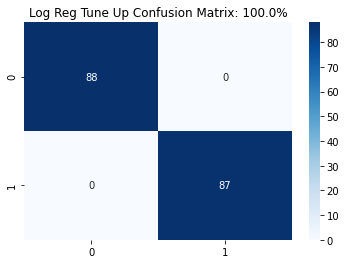

In [ ]:
lr_tune = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
lr_tune.fit(X_train, y_train)
lr_tune_pred = lr_tune.predict(X_test)
acc = accuracy_score(lr_tune_pred, y_test)
cm = confusion_matrix(lr_tune_pred, y_test)
plt.title(f"Log Reg Tune Up Confusion Matrix: {round(acc*100,2)}%")
sns.heatmap(cm, cmap="Blues", annot=True)
plt.show()